# Data Ingestion

In [1]:
import pandas as pd
data = pd.read_csv("gems.csv")
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,68551,0.31,Good,E,SI1,63.9,57.0,4.32,4.29,2.75,618
1,27814,0.33,Ideal,E,SI1,62.3,54.0,4.41,4.43,2.75,579
2,82570,0.80,Premium,H,VS2,60.5,60.0,6.01,5.96,3.62,2826
3,147788,0.90,Very Good,G,SI1,62.8,57.0,6.13,6.07,3.84,3210
4,61317,0.50,Premium,G,VVS2,62.3,58.0,5.08,5.11,3.17,1859


# Feature Engineering

In [2]:
# Finding number of rows and columns

data.shape

(10000, 11)

In [3]:
# To get following information : 
# 1.number of rows
# 2.number of columns
# 3.range index
# 4.column labels
# 5.number of cells in each column (non-null values)
# 6.column data types
# 7. memory usage

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10000 non-null  int64  
 1   carat    10000 non-null  float64
 2   cut      10000 non-null  object 
 3   color    10000 non-null  object 
 4   clarity  10000 non-null  object 
 5   depth    10000 non-null  float64
 6   table    10000 non-null  float64
 7   x        10000 non-null  float64
 8   y        10000 non-null  float64
 9   z        10000 non-null  float64
 10  price    10000 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 859.5+ KB


In [4]:
data.isnull().sum()
# No missing values present in the data

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
## Since id column does not put any effect on price of a gem. lets drop the id column
data=data.drop(labels=['id'],axis=1)
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.31,Good,E,SI1,63.9,57.0,4.32,4.29,2.75,618
1,0.33,Ideal,E,SI1,62.3,54.0,4.41,4.43,2.75,579
2,0.80,Premium,H,VS2,60.5,60.0,6.01,5.96,3.62,2826
3,0.90,Very Good,G,SI1,62.8,57.0,6.13,6.07,3.84,3210
4,0.50,Premium,G,VVS2,62.3,58.0,5.08,5.11,3.17,1859


In [6]:
## check for duplicated records
data.duplicated().sum()

0

In [7]:
numerical_columns=data.columns[data.dtypes!='object']
categorical_columns=data.columns[data.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [8]:
data[categorical_columns].describe()

,cut,color,clarity
count,10000,10000,10000
unique,5,7,8
top,Ideal,G,SI1
freq,4724,2315,2751


In [9]:
data[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.797805,61.823310,57.244530,5.729249,5.733818,3.542060,4027.584000
std,0.471044,1.081168,1.925132,1.121235,1.114398,0.693384,4111.574032
min,0.200000,55.400000,51.000000,3.780000,3.720000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.710000,4.710000,2.910000,945.000000
50%,0.710000,61.900000,57.000000,5.710000,5.730000,3.530000,2442.500000
75%,1.040000,62.400000,58.000000,6.520000,6.520000,4.040000,5418.500000
max,3.000000,68.800000,68.000000,9.420000,10.010000,5.670000,18795.000000


In [10]:
df2 = data
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.31,Good,E,SI1,63.9,57.0,4.32,4.29,2.75,618
1,0.33,Ideal,E,SI1,62.3,54.0,4.41,4.43,2.75,579
2,0.80,Premium,H,VS2,60.5,60.0,6.01,5.96,3.62,2826
3,0.90,Very Good,G,SI1,62.8,57.0,6.13,6.07,3.84,3210
4,0.50,Premium,G,VVS2,62.3,58.0,5.08,5.11,3.17,1859


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df2['cut']= label_encoder.fit_transform(df2['cut'])
df2['clarity']= label_encoder.fit_transform(df2['clarity'])
df2['color']= label_encoder.fit_transform(df2['color'])

In [12]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.31,1,1,2,63.9,57.0,4.32,4.29,2.75,618
1,0.33,2,1,2,62.3,54.0,4.41,4.43,2.75,579
2,0.80,3,4,5,60.5,60.0,6.01,5.96,3.62,2826
3,0.90,4,3,2,62.8,57.0,6.13,6.07,3.84,3210
4,0.50,3,3,7,62.3,58.0,5.08,5.11,3.17,1859


# Feature Selection

<AxesSubplot:>

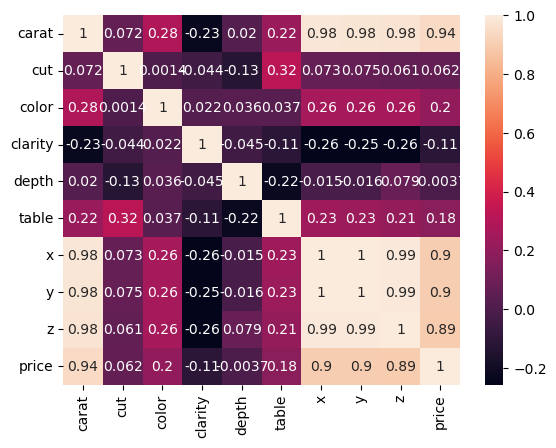

In [13]:
## correlation
import seaborn as sns
sns.heatmap(df2.corr(),annot=True)

In [14]:
# Remove column name having correlation greater than or equal to 0.7
df2 = df2.drop(['x','y','z'], axis=1)
df2.head()

,carat,cut,color,clarity,depth,table,price
0,0.31,1,1,2,63.9,57.0,618
1,0.33,2,1,2,62.3,54.0,579
2,0.80,3,4,5,60.5,60.0,2826
3,0.90,4,3,2,62.8,57.0,3210
4,0.50,3,3,7,62.3,58.0,1859
